# A4: Decision Tree and Naïve Cross-validation
Alex Dien
09/19/22

# Table of Contents

>[A4: Decision Tree and Naïve Cross-validation](#scrollTo=Hk0FF9Wsr-KO)

>[Table of Contents](#scrollTo=mo2g0z7dtnWo)

>[Code chunk 1 - Set up, data import and preparation](#scrollTo=qsR-rr7MsX4U)

>>>[A. import data](#scrollTo=5YQ09-P_uuxC)

>>>[B. Remove all numeric features, pop() target, Show overall structure, Encode](#scrollTo=CY13OGHlu7cx)

>>>[C. Partition this df for simple hold-out evaluation; 70% for training and 30% for testing](#scrollTo=aFlMz8HUIKHJ)

>>>[D. Show the distributions of each the target variables associated with the whole input data frame, the train set and the test set.](#scrollTo=P_hTdy_GNzJE)

>>>[E. Explain in a text box below the key differences between this dataset and the dataset from the previous assignment. They are in many ways similar, in what key ways are they different (consider the target variable and the sample size of the dataset)](#scrollTo=BoQaIC919lpc)

>[Code Chunk 2 - Simple Decision Tree Training and Testing](#scrollTo=Dc1iMMD8sdIs)

>>[A. Train a tree model using the default setting. Plot the tree. Generate and compare this mode's confusion matrices and classification evaluation metrics in testing and training sets.](#scrollTo=hbvWhC2UvhEz)

>[Code Chunk 3 - Simple Naïve Bayes Model Training and Testing](#scrollTo=BG06VTQO3sSJ)

>>>[A. Train a naive Bayes model using the training set from 1. Show information about this model. Generate and compare this model’s confusion matrices and classification evaluation metrics in testing and training sets](#scrollTo=qyndpkYK40vj)

>[Code chunk 4 – 5-fold and 10-fold decision tree and naive Bayes evaluation performance with sklearn's cross_validate()](#scrollTo=LNaSi1tSCPzB)

>>>[A. Use the data frame that keeps the entire set of input data to evaluate the decision tree and naive Bayes models by 5-fold as well as 10-fold cross-validation evaluations.](#scrollTo=cp3FakQJCh5Y)



# 1. Code chunk 1 - Set up, data import and preparation

load libraries

In [137]:
# load packages

import pandas as pd
import numpy as np
import sklearn

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt


### A. import data

In [138]:
df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_modified.csv")

### B. Remove all numeric features, pop() target, Show overall structure, Encode

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [140]:
# Drop the columns with numeric values
df.drop(df.columns[[0, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [141]:
# Pop y
y_target = df.pop('y')

In [142]:
# Convert it to 0,1
y_target = y_target.eq('yes').mul(1)

In [143]:
# Confirm there are no more numeric values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
dtypes: object(10)
memory usage: 321.8+ KB


In [144]:
# Show overall structure
df.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117
unique,12,4,7,2,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1012,2508,1264,3314,2175,3347,2650,1378,860,3522


In [145]:
# Summary of df
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


In [146]:
# One hot encode
df_encoded_X = pd.get_dummies(df)

### C. Partition this df for simple hold-out evaluation; 70% for training and 30% for testing

In [147]:
train_X, test_X, train_y, test_y = train_test_split(df_encoded_X, y_target, train_size=.7,random_state=42)

In [148]:
train_X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1588,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
997,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3126,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1952,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1132,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
466,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3092,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3772,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [149]:
test_X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2648,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
843,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2222,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2413,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3911,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2166,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
867,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### D. Show the distributions of each the target variables associated with the whole input data frame, the train set and the test set.

In [150]:
train_y.value_counts(normalize=True)

0    0.887539
1    0.112461
Name: y, dtype: float64

In [151]:
test_y.value_counts(normalize=True)

0    0.897249
1    0.102751
Name: y, dtype: float64

We can see here that 89% of our target variable is True, the client has subscribed a certified term deposit (CD) and the remaining 10% is False. 

### E. Explain in a text box below the key differences between this dataset and the dataset from the previous assignment. They are in many ways similar, in what key ways are they different (consider the target variable and the sample size of the dataset)

The key differences in this dataset is that the data values are not wrapped with quotations, unlike the other data set. The quotes prevent the comma inside of the value from being interpreted as a separator.

# 2. Code Chunk 2 - Simple Decision Tree Training and Testing

## A. Train a tree model using the default setting. Plot the tree. Generate and compare this mode's confusion matrices and classification evaluation metrics in testing and training sets.

In [152]:
# create decision tree. ccp_alpha param allows use to change the size of the tree. in this model, we change it to 2 leaf nodes.
tree_model_1 = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=.01)

In [153]:
# fitting process. first argument is a dataset of the predictors. second is a series of the target (y variable).
tree_model_1 = tree_model_1.fit(df_encoded_X, y_target)

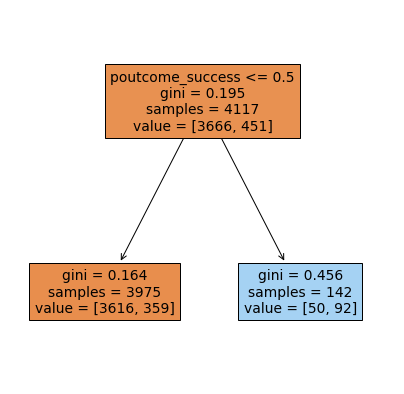

In [154]:
# plot the tree
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_1,
                   feature_names=df_encoded_X.columns.to_list(),
                   filled=True)

In [155]:
# Predict
model_1_pred = tree_model_1.predict(df_encoded_X)

In [156]:
# Generate confusion matrices
model_1_cf = confusion_matrix(y_true=y_target, y_pred=model_1_pred)
model_1_cf

array([[3616,   50],
       [ 359,   92]])

In [157]:
# Classification evaluation metrics
print(metrics.classification_report(y_target, tree_model_1.predict(df_encoded_X)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3666
           1       0.65      0.20      0.31       451

    accuracy                           0.90      4117
   macro avg       0.78      0.60      0.63      4117
weighted avg       0.88      0.90      0.88      4117



# 3. Code Chunk 3 - Simple Naïve Bayes Model Training and Testing


### A. Train a naive Bayes model using the training set from 1. Show information about this model. Generate and compare this model’s confusion matrices and classification evaluation metrics in testing and training sets 

In [158]:
#instantiate object
cnb = CategoricalNB()

In [159]:
# Generate confusion matrix
confusion_matrix(test_y,y_pred)

array([[171, 938],
       [ 17, 110]])

In [160]:
# Classification report
classification_report(test_y, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.15      0.26      1109\n           1       0.10      0.87      0.19       127\n\n    accuracy                           0.23      1236\n   macro avg       0.51      0.51      0.23      1236\nweighted avg       0.83      0.23      0.26      1236\n'

# 4. Code chunk 4 – 5-fold and 10-fold decision tree and naive Bayes evaluation performance with sklearn's cross_validate()

### A. Use the data frame that keeps the entire set of input data to evaluate the decision tree and naive Bayes models by 5-fold as well as 10-fold cross-validation evaluations.

In [161]:
scores = cross_validate(
    cnb, df_encoded_X, y_target, cv=5, scoring=['f1', 'accuracy', 'recall','precision'],return_train_score=False)
pd.DataFrame(scores)

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.024520,0.012320,0.421687,0.883495,0.388889,0.460526
1,0.014148,0.006439,0.369427,0.879854,0.318681,0.439394
2,0.012062,0.006757,0.402439,0.880923,0.366667,0.445946
3,0.011682,0.006229,0.375839,0.886999,0.311111,0.474576
4,0.011810,0.007472,0.411429,0.874848,0.400000,0.423529


In [162]:
scores = cross_validate(
    cnb, df_encoded_X, y_target, cv=10, scoring=['f1', 'accuracy', 'recall','precision'],return_train_score=False)
pd.DataFrame(scores)

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.016564,0.005788,0.527473,0.895631,0.533333,0.521739
1,0.022287,0.005791,0.329114,0.871359,0.288889,0.382353
2,0.012082,0.006049,0.405063,0.885922,0.355556,0.470588
3,0.013356,0.005826,0.297297,0.873786,0.244444,0.379310
4,0.020035,0.006277,0.425000,0.888350,0.377778,0.485714
5,0.012630,0.005630,0.385542,0.876214,0.355556,0.421053
6,0.017365,0.005718,0.250000,0.854369,0.217391,0.294118
7,0.012457,0.005787,0.459459,0.902676,0.377778,0.586207
8,0.018359,0.007432,0.380952,0.873479,0.355556,0.410256
9,0.013401,0.005648,0.439560,0.875912,0.444444,0.434783


In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
!cp "/content/drive/My Drive/Colab Notebooks/A4_Dien_Alex.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A4_Dien_Alex.ipynb"

[NbConvertApp] Converting notebook A4_Dien_Alex.ipynb to html
[NbConvertApp] Writing 377549 bytes to A4_Dien_Alex.html
